# Auto Example: Optimal Van Dimensions

In [1]:
# Basic Setup
%pip install -q ipywidgets
import ipywidgets as widgets
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sciopt

p = sym.Symbol("p")

## Cost Function Definition

Assume that van is a box, with length $x$, width $y$, and height $z$. 

The expected volume is $V=xyz=20m^3$. This is a constraint, but we will use it to eliminate variables.

In [2]:
V = 25
V

25

The aerodynamic drag is $F_D=130N$ per $m^2$ of frontal area (this is based a typical drag coefficient and temperature):

$$ J_1 = 130 A_f $$

In [3]:
FD = 130
FD

130

We use $x$ as the decision variable $p$, and so $A=V/p$, which leads to 

$$ J_1 = \frac{F_D*V}{p} = \frac{2600}{p} $$

This can be implemented and validated as:

In [4]:
def J1(p):
    return FD*V/p

J1(p)

3250/p

The second part of the cost function is based on the vehicle weight, which is assumed to be proportional to the surface area, leading to rolling friction.To simplify the analysis, we assume that the front is square ($y=z$), which leads to 

$$ y = z = \sqrt{V/p} $$

and a total surface area of

$ A_S = 2 (xy + yz + xz) = 4 x^2 + 2 xz $$

or 

$ A_S = 4 V/p + 2 \sqrt{Vp} $$

The friction (weight times drage coefficient) per surface area is assumed to be $F_T = 10N$:

In [5]:
FT = 10
FT

10

OVerall the tyre friction can be estimated as proportional to be:

$$ J_2 = \frac{4 F_T V}{p} + 2 F_T \sqrt{Vp} $$

In Python:

In [6]:
def J2(p):
    return 4*FT*V/p+2*FT*(V*p)**0.5

J2(p)

100.0*p**0.5 + 1000/p

Together, this gives us

$$ J = J_1 + J_2$$

This function is implemented here:

In [7]:
def J(p):
    return J1(p) + J2(p)

J(p)

100.0*p**0.5 + 4250/p

Note that the def keyword is not very flexible, and it may be preferable to define the function using the anonymous lambda expression, especially if the function has external variables:

In [8]:
func = lambda p : J1(p) + J2(p)

func(p)

100.0*p**0.5 + 4250/p

## Plot The Cost Function

First, we want to plot this function. 

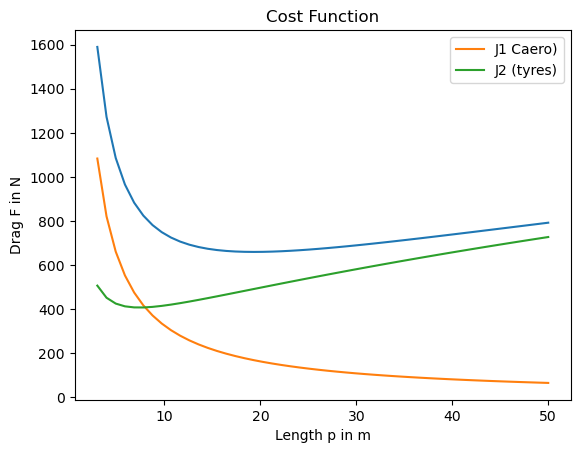

In [9]:
ps = np.linspace(3,50)
Js = J(ps)
J1s = J1(ps)
J2s = J2(ps)

plt.plot(ps,Js)
plt.plot(ps,J1s, label="J1 Caero)")
plt.plot(ps,J2s, label="J2 (tyres)")

plt.xlabel("Length p in m")
plt.ylabel("Drag F in N")
plt.title("Cost Function")
plt.legend()
plt.show()

## Optimisation

Now we can use a minimisation alogrithm to find the exact minimum:

In [10]:
pstar = sciopt.minimize(J,[5])
pstar

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 659.5244508237355
        x: [ 1.933e+01]
      nit: 11
      jac: [-7.629e-06]
 hess_inv: [[ 1.133e+00]]
     nfev: 24
     njev: 12

## Create Derivatives

Finally, we can find the derivates of the cost function for further analysis.

In [11]:
p=sym.Symbol("p")
Jp=J(p)
Jp

100.0*p**0.5 + 4250/p

In [12]:
Jp1=sym.diff(Jp,p)
Jp1

50.0/p**0.5 - 4250/p**2

In [13]:
sym.solve(Jp1,p)

[19.3321111659706]

In [14]:
Jp2=sym.diff(Jp1,p)
Jp2

-25.0/p**1.5 + 8500/p**3